In [12]:
# Import the libraries
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from pathlib import Path
from PIL import Image
import numpy as np

class FeatureExtractor:
    def __init__(self):
        # Use VGG-16 as the architecture and ImageNet for the weight
        base_model = VGG16(weights='imagenet')
        # Customize the model to return features from fully-connected layer
        self.model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)
    def extract(self, img):
        # Resize the image
        img = img.resize((224, 224))
        # Convert the image color space
        img = img.convert('RGB')
        # Reformat the image
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        # Extract Features
        feature = self.model.predict(x)[0]
        return feature / np.linalg.norm(feature)
fe = FeatureExtractor()
# Iterate through images (Change the path based on your image location)
for img_path in sorted(Path("/content/dataset").glob("*.jpg")):
    # print(img_path)
    # Extract Features
    feature = fe.extract(img=Image.open(img_path))
    # Save the Numpy array (.npy) on designated path
    feature_path = Path("/content/feature") / (img_path.stem + ".npy")
    np.save(feature_path, feature)


QUERY IMAGE


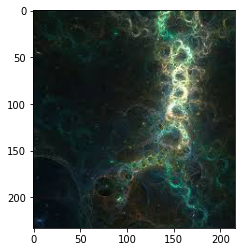

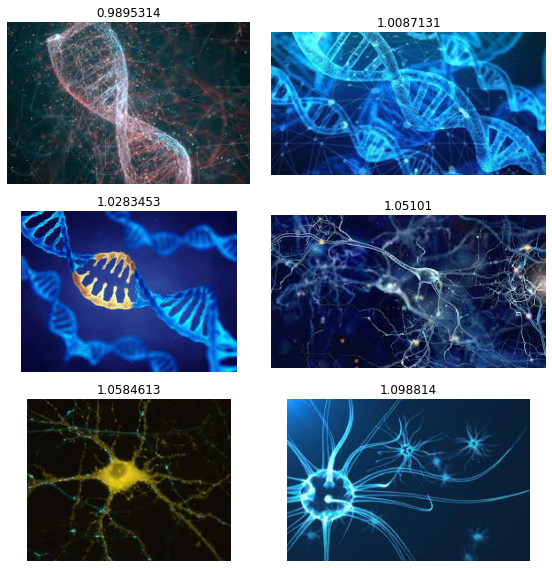

QUERY IMAGE


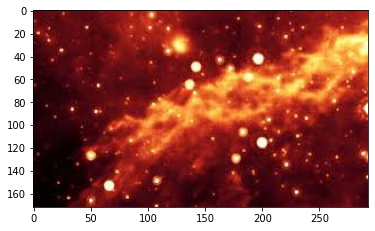

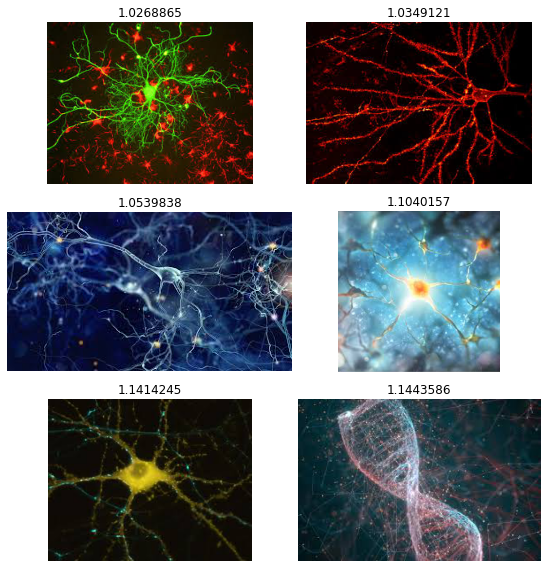

QUERY IMAGE


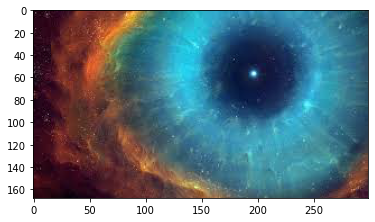

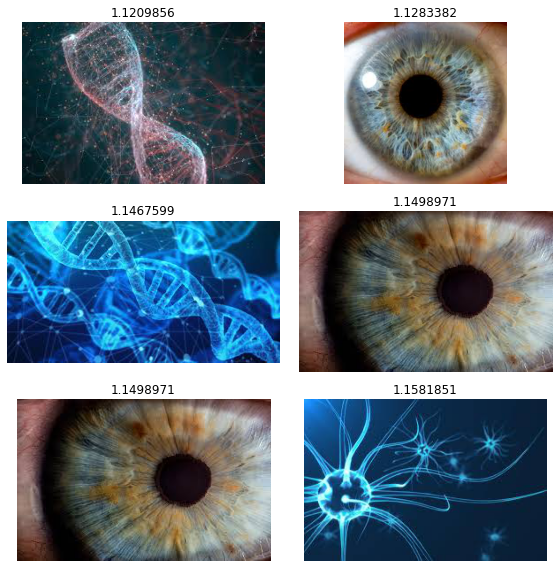

QUERY IMAGE


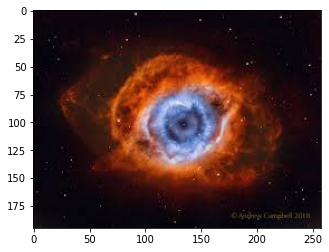

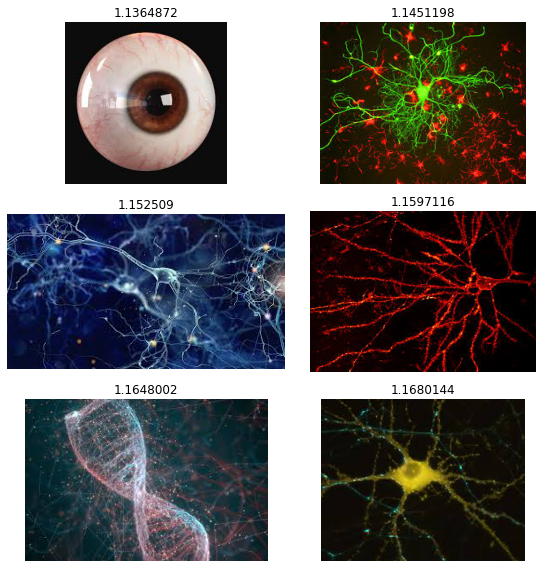

QUERY IMAGE


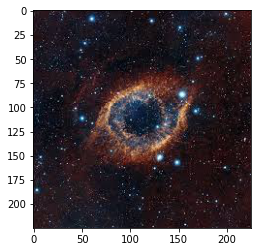

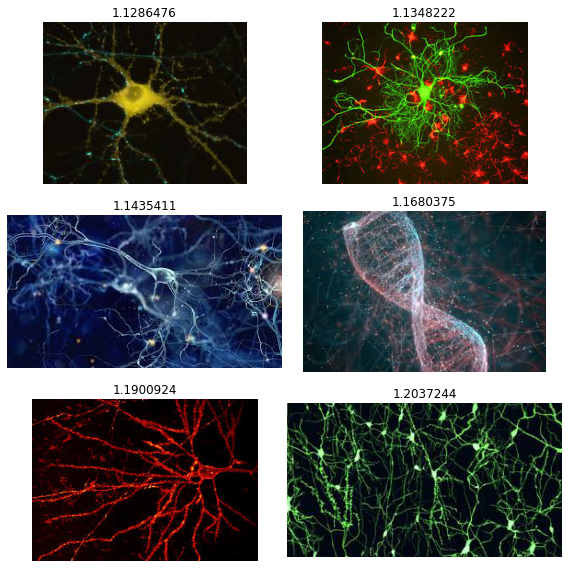

QUERY IMAGE


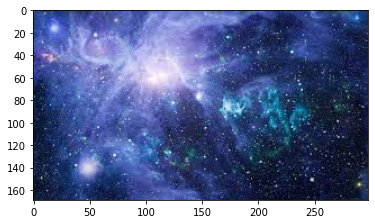

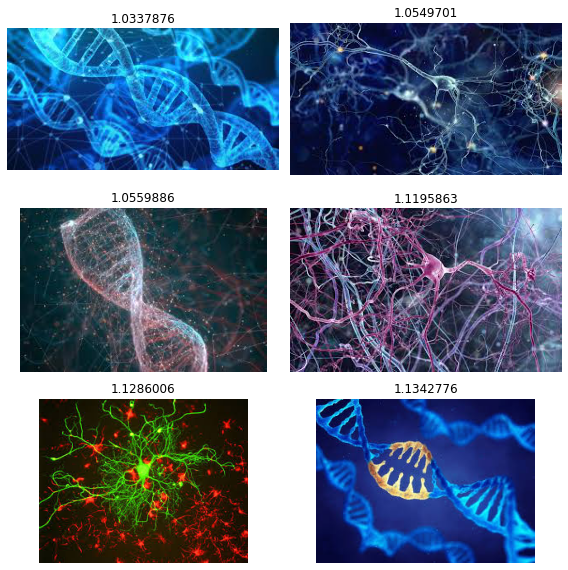

QUERY IMAGE


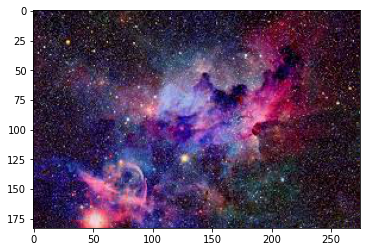

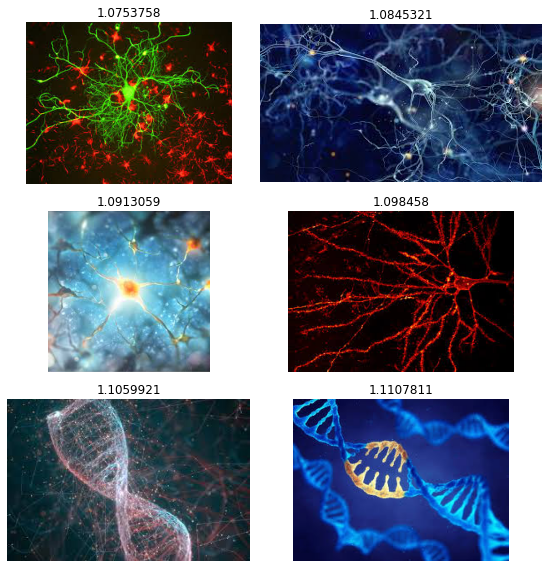

QUERY IMAGE


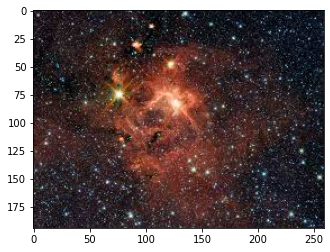

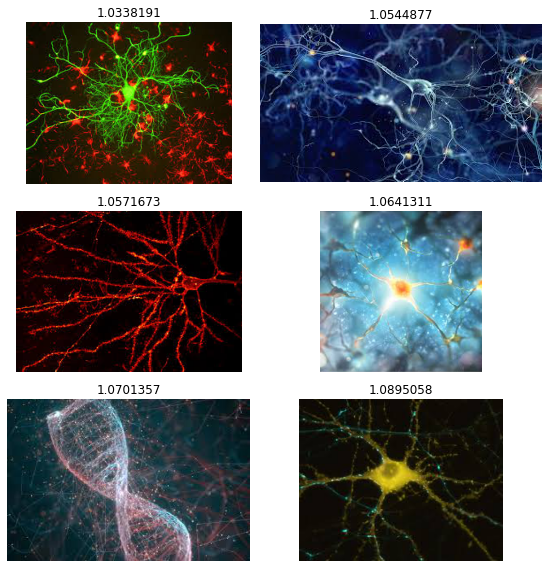

QUERY IMAGE


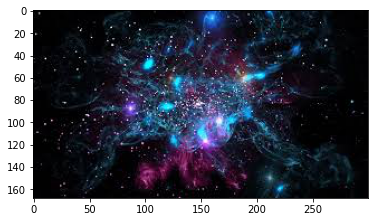

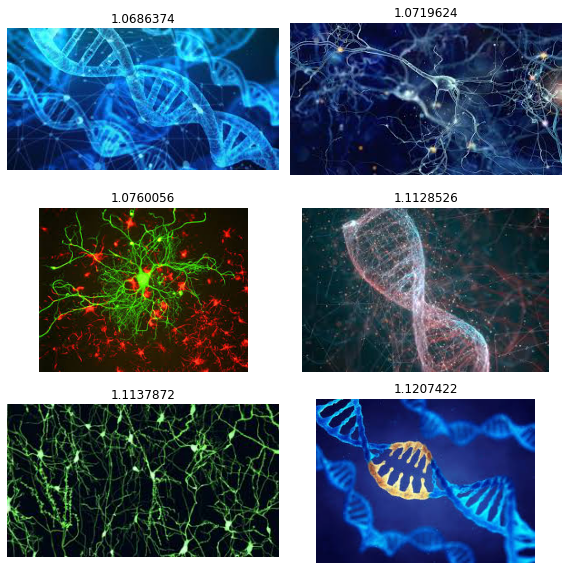

In [13]:
# Import the libraries
import matplotlib.pyplot as plt
import numpy as np

fe = FeatureExtractor()
features = []
img_paths = []
for feature_path in Path("/content/feature").glob("*.npy"):
    features.append(np.load(feature_path))
    img_paths.append(Path("/content/dataset") / (feature_path.stem + ".jpg"))
features = np.array(features)

for query_path in sorted(Path("/content/query").glob("*.jpg")): 
  # Insert the image query
  img = Image.open(query_path)
  print('QUERY IMAGE')
  plt.imshow(img)
  # Extract its features
  query = fe.extract(img)

  # Calculate the similarity (distance) between images
  dists = np.linalg.norm(features - query, axis=1)
  # Extract 30 images that have lowest distance
  ids = np.argsort(dists)[:6]
  scores = [(dists[id], img_paths[id]) for id in ids]
  # Visualize the result
  axes=[]
  fig=plt.figure(figsize=(8,8))
  for a in range(3*2):
      score = scores[a]
      axes.append(fig.add_subplot(3, 2, a+1))
      subplot_title=str(score[0])
      axes[-1].set_title(subplot_title)  
      plt.axis('off')
      plt.imshow(Image.open(score[1]))
  fig.tight_layout()
  plt.show()